In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("Set3")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os


In [18]:
df = pd.read_csv("C:\\Users\\Aastha\\Desktop\\0000\\Covid Data.csv")

In [19]:
df.head(15)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [21]:
df.isnull().sum().sum()

0

# DATA PREPROCESSING

In [50]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [51]:
df.PREGNANT = df.PREGNANT.replace(98, 2)
df.PREGNANT = df.PREGNANT.replace(97, 2)

In [54]:
df.CLASIFFICATION_FINAL.value_counts()

1    636274
0    388878
Name: CLASIFFICATION_FINAL, dtype: int64

In [55]:
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

In [56]:
df.CLASIFFICATION_FINAL.value_counts()

1    636274
0    388878
Name: CLASIFFICATION_FINAL, dtype: int64

In [58]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,0
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,0
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,0


In [33]:
df.YEAR.value_counts()

2020    74402
2021      312
Name: YEAR, dtype: int64

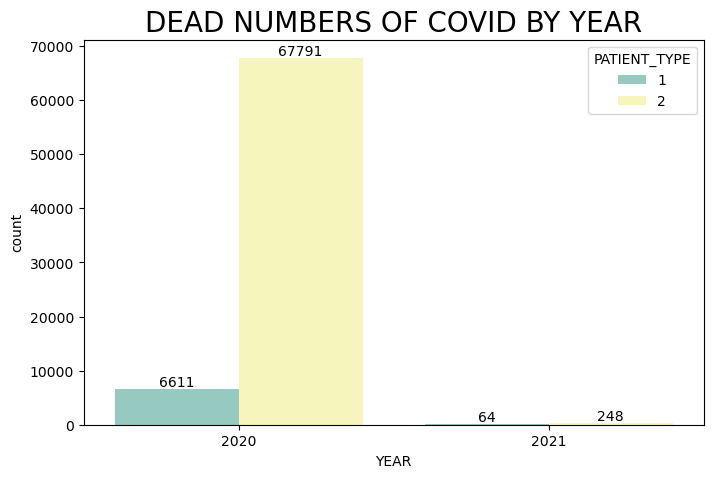

In [34]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "YEAR", hue = "PATIENT_TYPE", data = df)
plt.title("DEAD NUMBERS OF COVID BY YEAR", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

**In 2020,**
* **Around 68000 people died from covid and not hospitalized**
* **Around 6600 people died from covid and hospitalized**

**In 2021,**
* **Around 60 people died from covid and not hospitalized**
* **Around 250 people died from covid and hospitalized.**

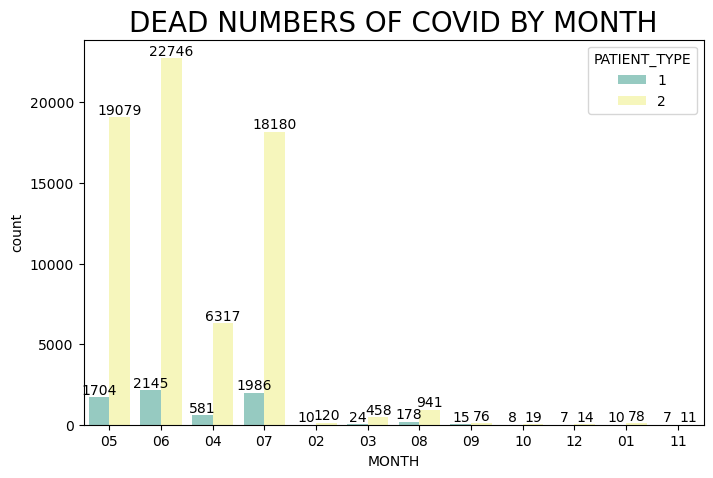

In [35]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "MONTH", hue = "PATIENT_TYPE", data = df)
plt.title("DEAD NUMBERS OF COVID BY MONTH", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

**People died in April, May, June and July the most.**

In [36]:
df.drop(["DATE_DIED", "MONTH", "YEAR"], axis = 1, inplace = True)

In [37]:
df["CLASIFFICATION_FINAL"] = df["CLASIFFICATION_FINAL"] - 1

# XGBOOST MODEL

In [38]:
x = df.drop("CLASIFFICATION_FINAL", axis = 1)
y = df["CLASIFFICATION_FINAL"]

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 200, 
                    learning_rate=0.1)

xgb.fit(x_train, y_train)

pred = xgb.predict(x_test)

**Checking XGB Model's accuracy and AUC score**

In [41]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix
accuracy_score(pred, y_test)
roc_auc_score(pred, y_test)

print("XGB Model's Accuracy is "+str(accuracy_score(pred, y_test)))
print("XGB Model's AUC score is "+str(roc_auc_score(pred, y_test)))

XGB Model's Accuracy is 0.6652728372341048
XGB Model's AUC score is 0.655213071053069


## Checking Recall

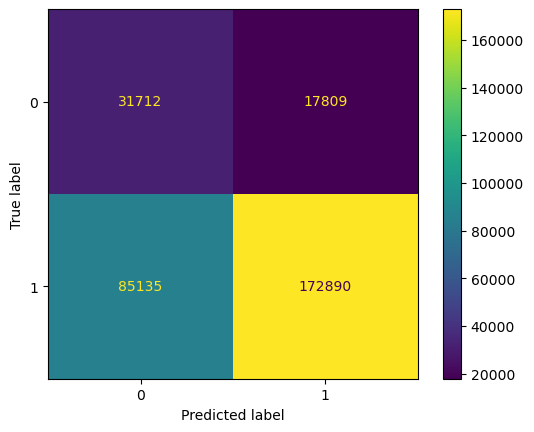

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix(pred, y_test))
disp = disp.plot()

* ***TP -> 31712*** *Our prediction is 1 and real label is 1*
* ***TN -> 172890*** *Our prediction is 0 and real label is 0*
* ***FP -> 85135*** *Our prediction is 1 and real label is 0*
* ***FN -> 17809*** *Our prediction is 0 and real label is 1*

***Recall = TP / (FN + TP)***
***Recall = 31712 / (31712 + 17809) = 0.64***

**Recall is important to us now because it shows how many of the positive values we have guessed positive correctly.**

**Our model has a recall of 0.64—in other words, it correctly identifies 64% of all COVID-19s.**

In [43]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.27      0.64      0.38     49521
           1       0.91      0.67      0.77    258025

    accuracy                           0.67    307546
   macro avg       0.59      0.66      0.58    307546
weighted avg       0.80      0.67      0.71    307546



# FEATURE IMPORTANCES

In [44]:
df_importances = pd.DataFrame(list(x), xgb.feature_importances_)
df_importances.columns = ["Feature_Names"]
df_importances["Importances"] = df_importances.index
df_importances = df_importances.sort_values(by = "Importances", ascending = False)
df_importances.index = np.arange(0,len(df_importances))

In [45]:
df_importances

,Feature_Names,Importances
0,PNEUMONIA,0.583816
1,PATIENT_TYPE,0.129989
2,OBESITY,0.037612
3,AGE,0.037008
4,TOBACCO,0.024308
5,SEX,0.023564
6,MEDICAL_UNIT,0.022823
7,RENAL_CHRONIC,0.020644
8,COPD,0.020492
9,INMSUPR,0.019068


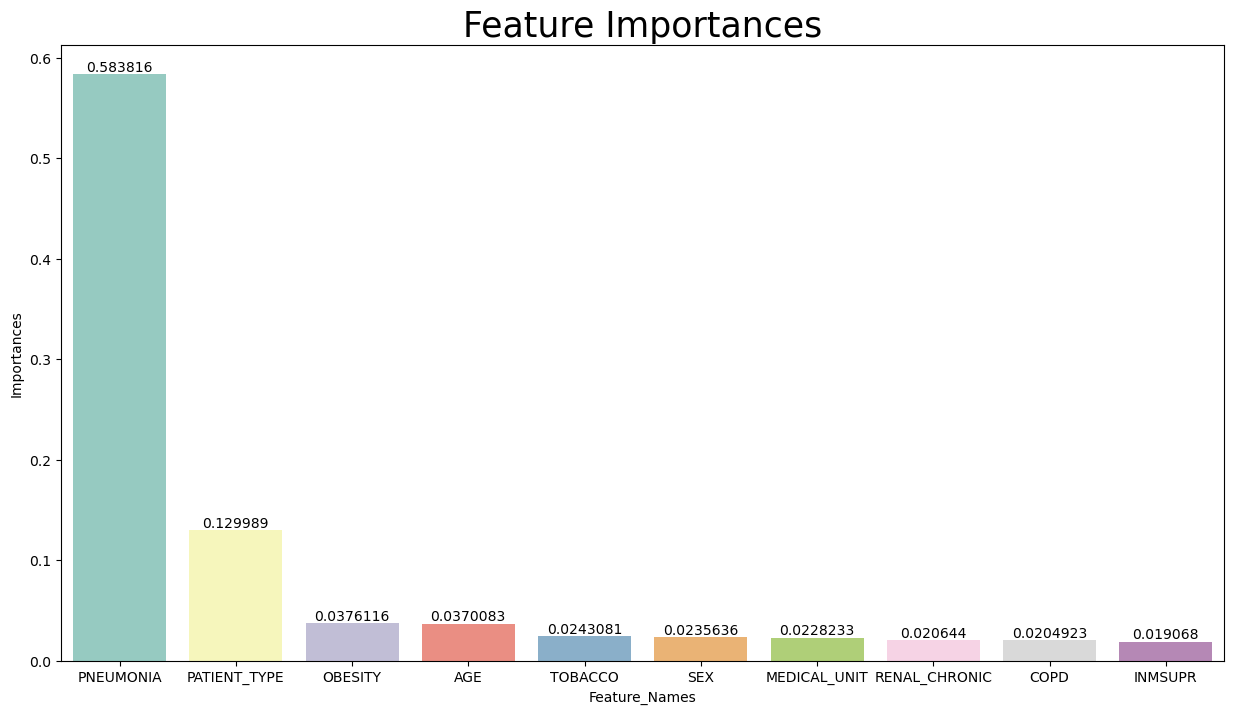

In [46]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = "Feature_Names", y = "Importances", data = df_importances.sort_values(
    by = "Importances", ascending=False)[0:10])
plt.title("Feature Importances", fontsize = 25)
for bars in ax.containers:
    ax.bar_label(bars)

**Hmm, PNEUMONIA affects COVID19 the most.**